# Previsão de preços de carros usados usando o modelo RF

# Importing libraries

In [1]:
import numpy as np
import random as rd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Loading the raw data

In [2]:
# Load the datasets
data = pd.read_csv('../DataSet/dataset.csv')
#just_features = pd.read_csv('../just_features.csv')

In [3]:
data.shape

(25000, 10)

In [4]:
data.head()

,id,tipo,ano_registo,caixa,potencia,km,combustivel,marca,com_danos,preco
0,26713,limousine,2014,manual,140,40800,gasolina,outra,nao,14200
1,49553,limousine,2013,manual,184,30300,diesel,bmw,nao,25840
2,9007,coupe,2009,manual,177,150900,diesel,bmw,nao,9990
3,21152,compacto,2006,manual,54,150500,gasolina,volkswagen,nao,3250
4,37819,limousine,2015,manual,150,40600,diesel,volkswagen,nao,16939


# Preprocessing

### Exploring the descriptive statistics of the variables

In [5]:
data.describe(include='all')

,id,tipo,ano_registo,caixa,potencia,km,combustivel,marca,com_danos,preco
count,25000.000000,25000,25000.000000,25000,25000.000000,25000.000000,25000,25000,25000,25000.000000
unique,NaN,8,NaN,2,NaN,NaN,3,10,2,NaN
top,NaN,limousine,NaN,manual,NaN,NaN,gasolina,outra,nao,NaN
freq,NaN,6847,NaN,18713,NaN,NaN,14673,5783,22805,NaN
mean,49878.823840,NaN,2006.577600,NaN,137.546760,121195.808000,NaN,NaN,NaN,7876.264120
std,28932.226902,NaN,4.283129,NaN,214.565586,41268.626786,NaN,NaN,NaN,11657.351891
min,1.000000,NaN,2000.000000,NaN,3.000000,5000.000000,NaN,NaN,NaN,1.000000
25%,24673.750000,NaN,2003.000000,NaN,90.000000,90900.000000,NaN,NaN,NaN,2389.000000
50%,49997.500000,NaN,2006.000000,NaN,122.000000,150100.000000,NaN,NaN,NaN,5030.000000
75%,75016.500000,NaN,2010.000000,NaN,163.000000,150600.000000,NaN,NaN,NaN,10020.000000


# Check for any missing value in data set and treat it

In [6]:
data.isna().sum()

id             0
tipo           0
ano_registo    0
caixa          0
potencia       0
km             0
combustivel    0
marca          0
com_danos      0
preco          0
dtype: int64

# Tranform ano_registo into age

In [7]:
# current year
current_year = 2024
# Tranform ano_registo into car age
data['idade'] = current_year - data['ano_registo']
data.drop(['ano_registo'],axis = 1,inplace = True)

In [8]:
data.head()

,id,tipo,caixa,potencia,km,combustivel,marca,com_danos,preco,idade
0,26713,limousine,manual,140,40800,gasolina,outra,nao,14200,10
1,49553,limousine,manual,184,30300,diesel,bmw,nao,25840,11
2,9007,coupe,manual,177,150900,diesel,bmw,nao,9990,15
3,21152,compacto,manual,54,150500,gasolina,volkswagen,nao,3250,18
4,37819,limousine,manual,150,40600,diesel,volkswagen,nao,16939,9


# Data exploration
### Exploring the PDFs
The probability distribution will show us how that variable is distributed

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_8888\1755627352.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['preco'])


Text(0.5, 1.0, 'Car Price Distribution Plot')

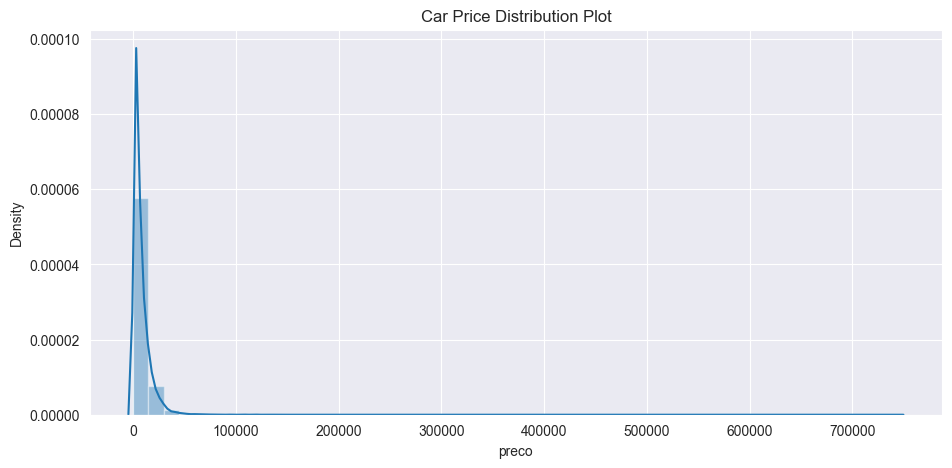

In [9]:
# This makes it very easy to spot anomalies, such as outliers
plt.figure(figsize=[11,5])
sns.distplot(data['preco'])
plt.title('Car Price Distribution Plot')

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_8888\654924165.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['idade'])
C:\Users\Utilizador\AppData\Local\Temp\ipykernel_8888\654924165.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['km'])
C:\Users\Utilizador\AppData\Local\Tem

(0.0, 1500.0)

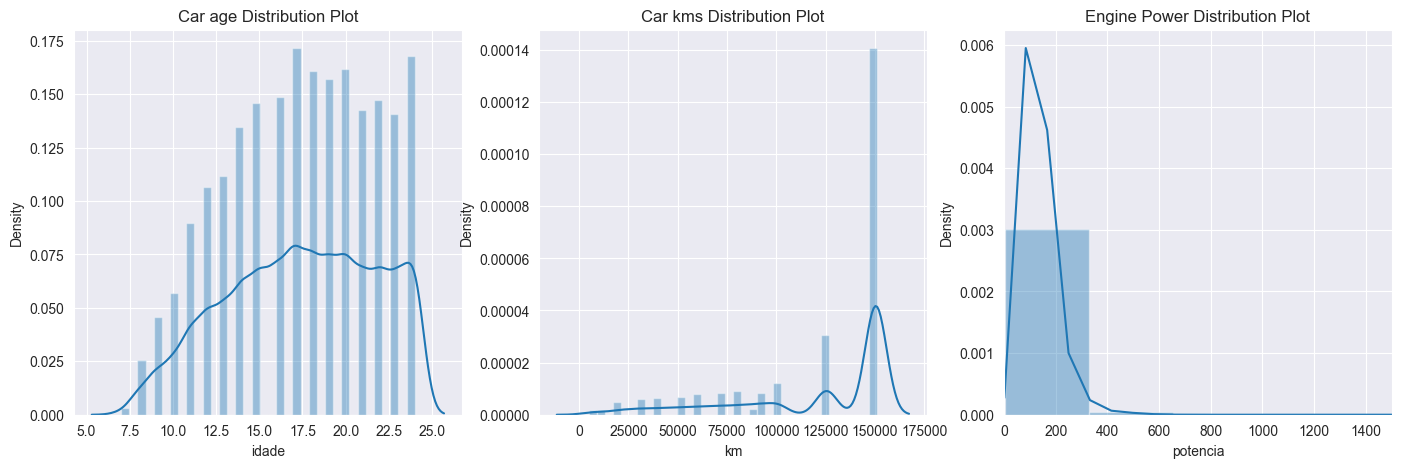

In [10]:
# car and mileage Distribution Plot
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.distplot(data['idade'])
plt.title('Car age Distribution Plot')

plt.subplot(1,3,2)
sns.distplot(data['km'])
plt.title('Car kms Distribution Plot')

plt.subplot(1,3,3)
sns.distplot(data['potencia'])
plt.title('Engine Power Distribution Plot')
plt.xlim(0, 1500)

# Categorical Features

In [11]:
# Get unique attributes for columns with duplicate values
print(f'tipo -> {data['tipo'].unique()}')
print(f'caixa -> {data['caixa'].unique()}')
print(f'com_danos -> {data['com_danos'].unique()}')
print(f'combustivel -> {data['combustivel'].unique()}')
print(f'marca -> {data['marca'].unique()}')

tipo -> ['limousine' 'coupe' 'compacto' 'kombi' 'carrinha' 'suv' 'cabrio' 'outro']
caixa -> ['manual' 'automatica']
com_danos -> ['nao' 'sim']
combustivel -> ['gasolina' 'diesel' 'outro']
marca -> ['outra' 'bmw' 'volkswagen' 'audi' 'opel' 'ford' 'mercedes_benz' 'fiat'
 'renault' 'peugeot']


In [12]:
#Creating Dummie Variables
data = pd.get_dummies(data,drop_first=True)

In [13]:
data.head()

,id,potencia,km,preco,idade,tipo_carrinha,tipo_compacto,tipo_coupe,tipo_kombi,tipo_limousine,...,marca_bmw,marca_fiat,marca_ford,marca_mercedes_benz,marca_opel,marca_outra,marca_peugeot,marca_renault,marca_volkswagen,com_danos_sim
0,26713,140,40800,14200,10,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,49553,184,30300,25840,11,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
2,9007,177,150900,9990,15,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
3,21152,54,150500,3250,18,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,37819,150,40600,16939,9,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False


# Pearson correlation

In [14]:
data.corr(method ='pearson')
#to find the pairwise correlation of all columns in the dataframe
%matplotlib inline 
#to display the plot directly below the code cell.
corrmat = data.corr(method='pearson')
corrmat.index

Index(['id', 'potencia', 'km', 'preco', 'idade', 'tipo_carrinha',
       'tipo_compacto', 'tipo_coupe', 'tipo_kombi', 'tipo_limousine',
       'tipo_outro', 'tipo_suv', 'caixa_manual', 'combustivel_gasolina',
       'combustivel_outro', 'marca_bmw', 'marca_fiat', 'marca_ford',
       'marca_mercedes_benz', 'marca_opel', 'marca_outra', 'marca_peugeot',
       'marca_renault', 'marca_volkswagen', 'com_danos_sim'],
      dtype='object')

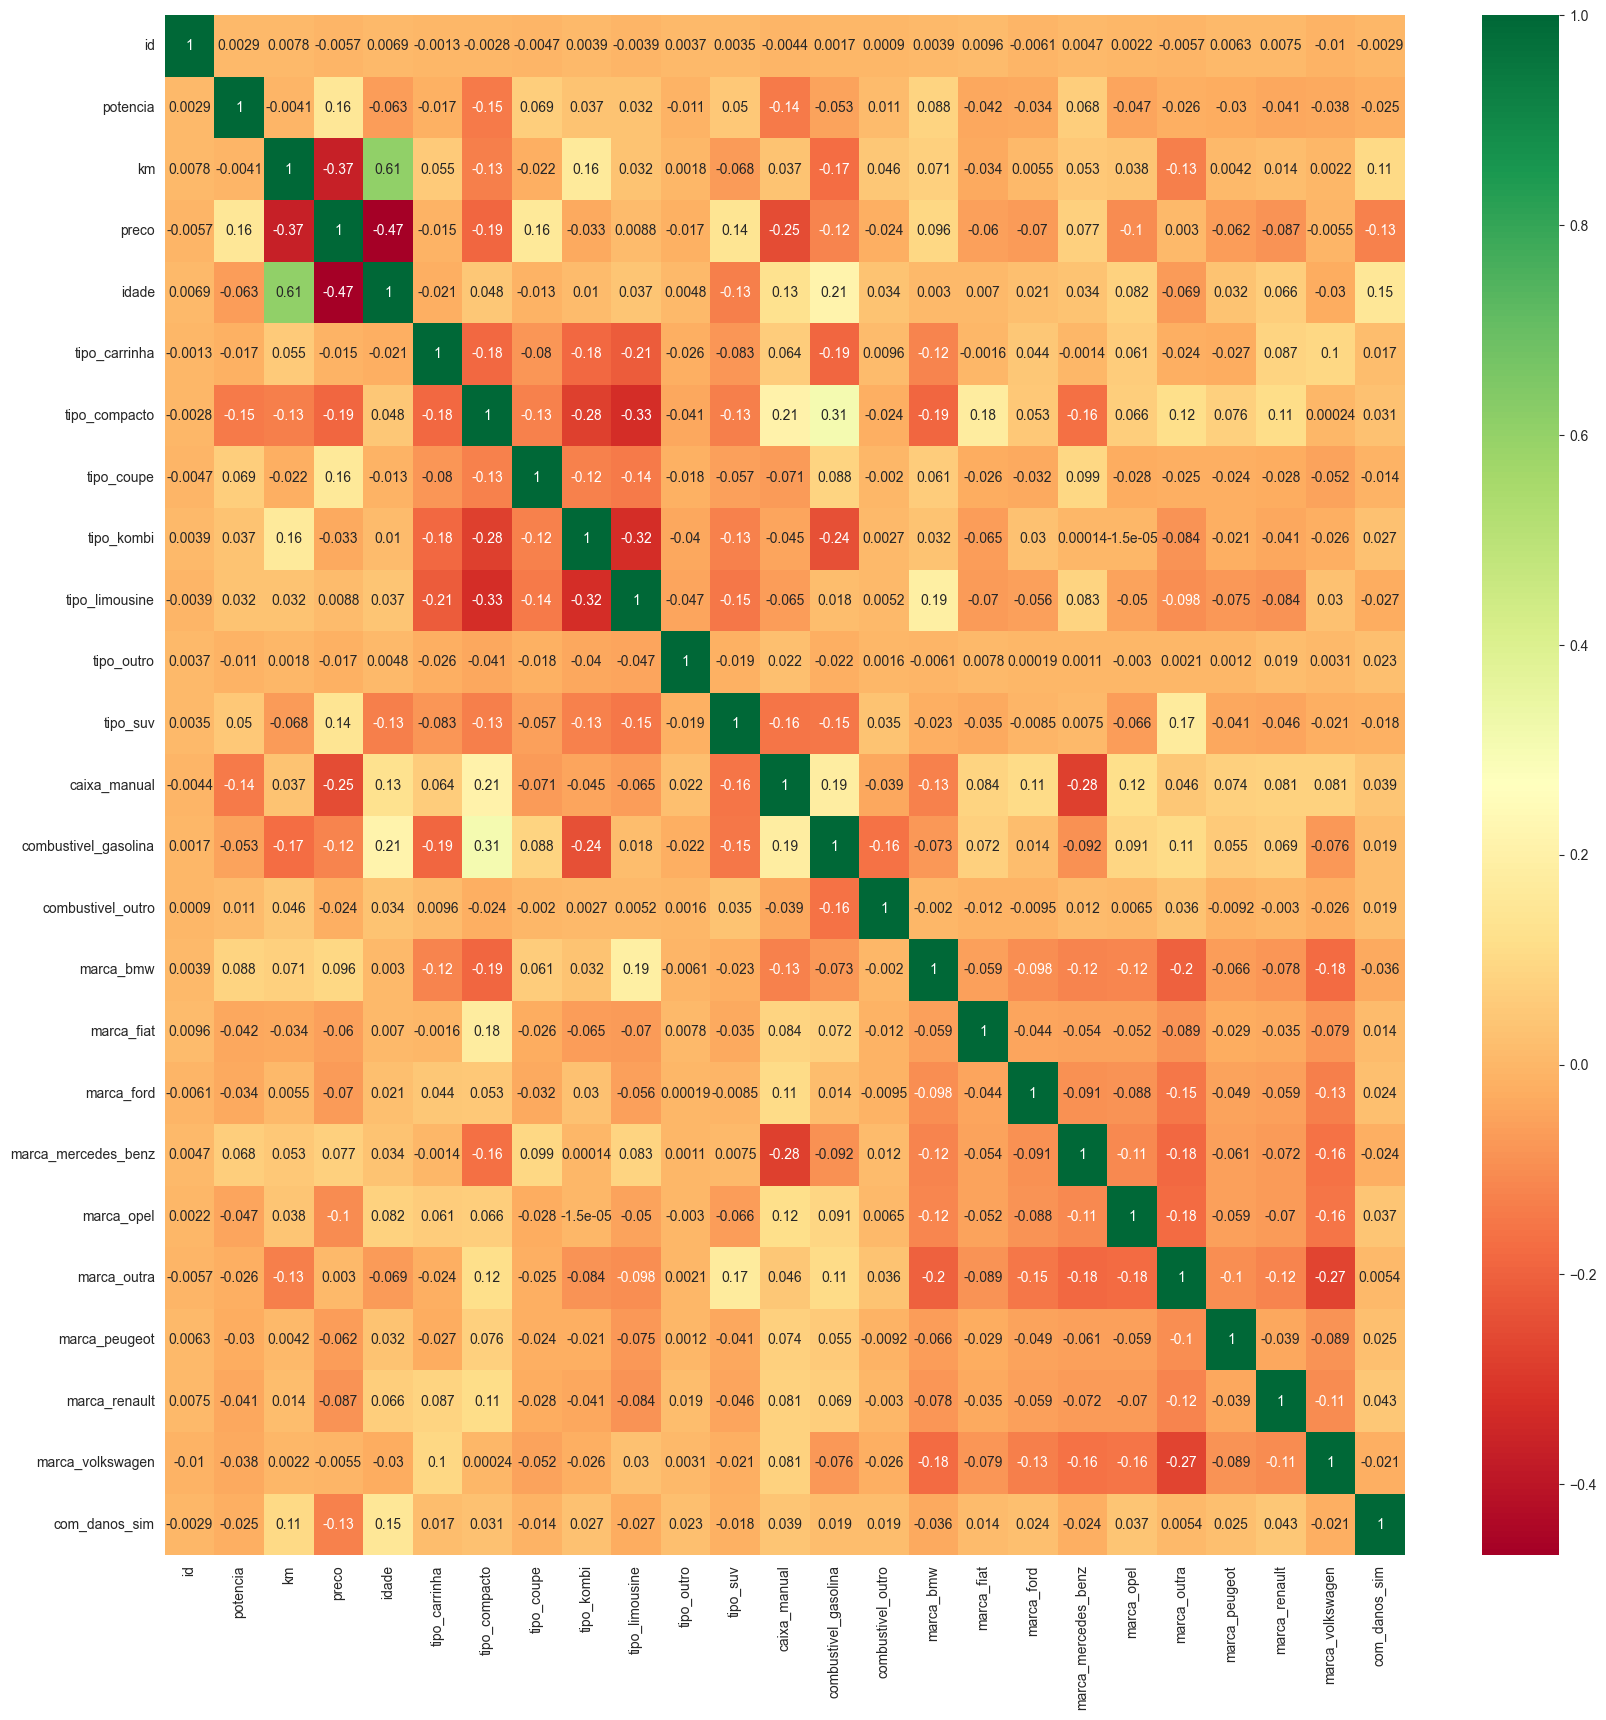

In [15]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr(method='pearson')
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map of the corerlation of the features
g=sns.heatmap(data[top_corr_features].corr(method='pearson'),annot=True,cmap="RdYlGn")
#annot = true will write the data in each cell. 
#cmap sets the color of the maps

# Check most important features

[3.36118219e-01 1.25268170e-01 3.00542824e-01 2.90895189e-03
 2.82921753e-02 2.13241269e-02 3.85763221e-03 5.84871271e-03
 1.63400192e-04 4.70806823e-03 9.75116802e-02 6.96361357e-03
 4.53107779e-04 9.65759575e-03 3.77770323e-04 3.59800275e-03
 4.22029905e-03 1.69109498e-03 3.62649856e-02 6.11665918e-04
 8.60868701e-04 4.94298721e-03 3.81404713e-03]


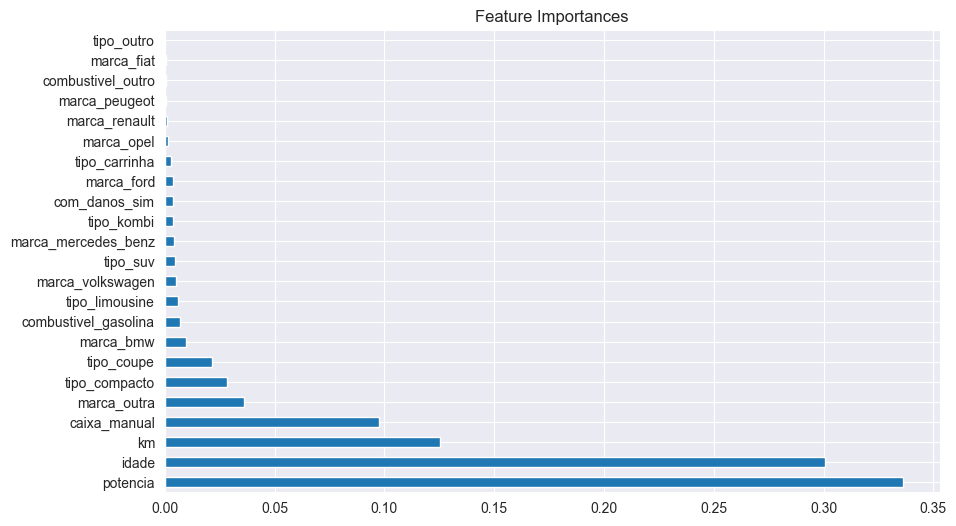

In [52]:
# The k-fold CV
from sklearn.ensemble import ExtraTreesRegressor

#in ensemble predictions of several base estimators are built in with a given learning algorithm.
#we used ExtraTreesRegressor
model = ExtraTreesRegressor(random_state=42)
#This class implements a meta estimator that fits a number of randomized decision trees 
#on various sub-samples of the dataset and uses averaging to improve the 
#predictive accuracy and control over-fitting.
x = data.drop(['preco', 'id'],axis=1)
y = data['preco']
model.fit(x, y)
print(model.feature_importances_)
#shows the feature importance that contribute to the selling price feature
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(23).plot(kind='barh')
plt.title('Feature Importances')
plt.show()

# Model Development
# Declaring dependent and independent variable

# Normalize the data for increased performance

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your DataFrame and you want to scale the columns
scaler = MinMaxScaler()
scaler.fit(data.drop(['preco', 'id'], axis=1))

preco = data['preco'].copy()

scaled_data = pd.DataFrame(scaler.fit_transform(data.drop(['preco', 'id'], axis=1))) 

scaled_data['preco'] = preco

In [21]:
scaled_data.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,preco
0,0.008400,0.245205,0.176471,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,14200
1,0.011098,0.173288,0.235294,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25840
2,0.010669,0.999315,0.470588,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9990
3,0.003127,0.996575,0.647059,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3250
4,0.009013,0.243836,0.117647,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16939


In [22]:
x = scaled_data.drop(['preco'],axis=1)
y = scaled_data['preco']

In [23]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.008400,0.245205,0.176471,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.011098,0.173288,0.235294,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.010669,0.999315,0.470588,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.003127,0.996575,0.647059,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.009013,0.243836,0.117647,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Training and Testing Data

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.14, random_state=365)
#we divide the data into 2 parts :- 85% train and 15% test data 
# and random_state is used to guarantee that same sequence of 
#random numbers are generated each time you run the code. 
#And unless there is some other randomness present in the process, 
#the results produced will be same as always.

In [51]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(21499, 23) (3501, 23) (21499,) (3501,)


# Random Forest Regressor Model

In [58]:
# Model Building
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=30)

# Training Model
rf.fit(x_train,y_train)

# Model Summary
y_pred_rf = rf.predict(x_test)

r_squared = r2_score(y_test,y_pred_rf)
#rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))

print("R_squared :",r_squared)
print(f'{r_squared * 100} %')

R_squared : 0.8768788895752199
87.68788895752199 %


# Plotting train results vs real values

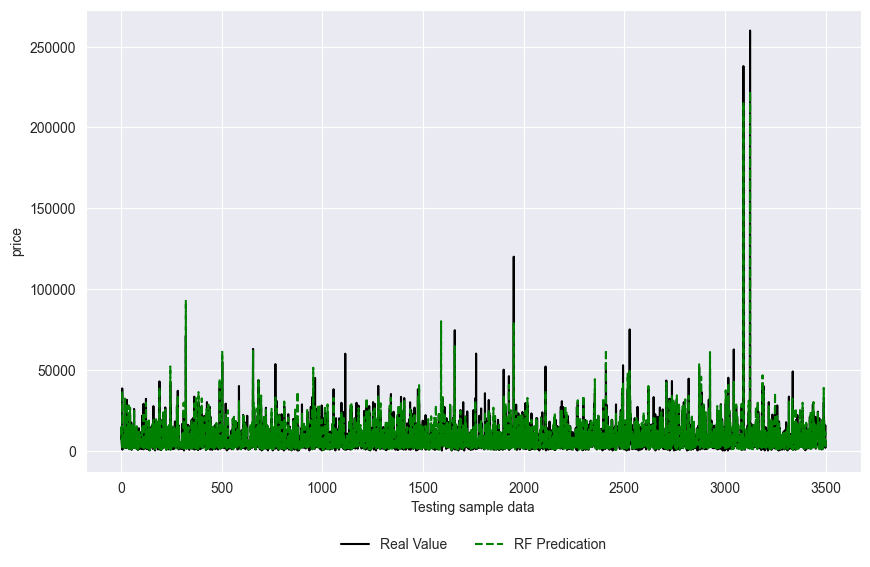

In [46]:
# Plotting the observed and predicted data
import matplotlib.pyplot as plt

# Setting the boundaries and parameters
plt.rcParams['figure.figsize'] = (10, 6)
x_ax = range(len(x_test))
#Ploting
plt.plot(x_ax, y_test, label='Real Value', color='k', linestyle='-')
plt.plot(x_ax, y_pred_rf, label='RF Predication', color='green', linestyle='--')
plt.ylabel('price')
plt.xlabel('Testing sample data')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='lower center', ncol=2, frameon=False)
plt.show()

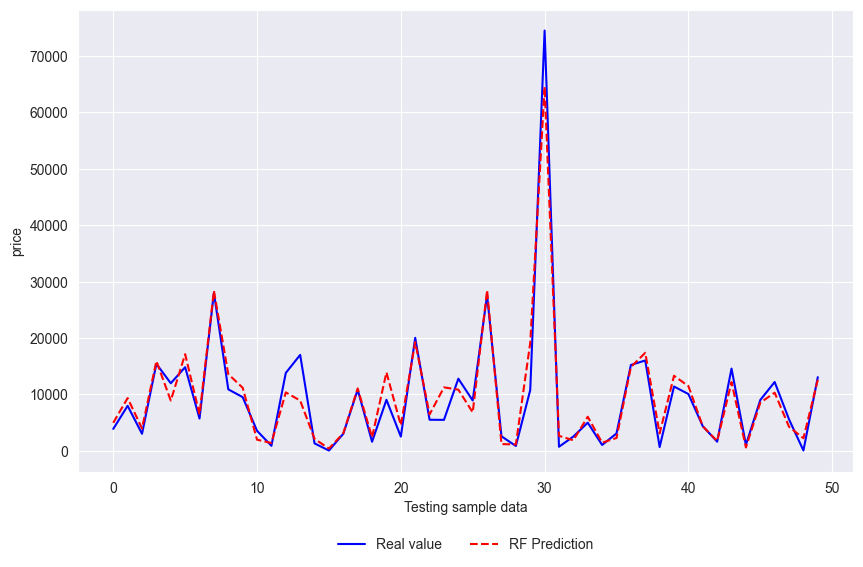

In [47]:
# Plot a more visualized view
import random as rd

# Setting the boundaries and parameters
plt.rcParams['figure.figsize'] = (10, 6)
x_ax = range(0, 50)
# Setting random search plot

st = rd.randint(0, 4550)  #start
nd = st + 50  #end

# Plotting
plt.plot(x_ax, y_test[st:nd], label='Real value', color='blue', linestyle='-')
plt.plot(x_ax, y_pred_rf[st:nd], label='RF Prediction', color='red', linestyle='--')
plt.ylabel('price')
plt.xlabel('Testing sample data')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='lower center', ncol=2, frameon=False)
plt.show()

In [48]:
# Display the preprocessed data
data.describe() 

,id,potencia,km,preco,idade
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,49878.823840,137.546760,121195.808000,7876.264120,17.422400
std,28932.226902,214.565586,41268.626786,11657.351891,4.283129
min,1.000000,3.000000,5000.000000,1.000000,7.000000
25%,24673.750000,90.000000,90900.000000,2389.000000,14.000000
50%,49997.500000,122.000000,150100.000000,5030.000000,18.000000
75%,75016.500000,163.000000,150600.000000,10020.000000,21.000000
max,99998.000000,16312.000000,151000.000000,745060.000000,24.000000


In [ ]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 15, stop = 1000, num = 12)]
#n_estimators is a parameter of the random forest regressor which is used to control no of trees in the forest
#so we use 100 200 ....1200 trees for the model
print(n_estimators)

In [ ]:
#Randomized Search CV
# Number of features to consider at every split
max_features = ['sqrt', 'log2', 0.5] # considering square root, log2 and 50% of features

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
#we create trees with 5 10 15 for each model...and train it

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# we split as 2 nodes forst then 5 then 10 like that till 100 from the list

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
max_depth

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
#Randomized search on hyper parameters.
#used to select the best parameter for the model

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

In [ ]:
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validatio
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 5, cv = 10, verbose=2, random_state=84, n_jobs = 1)

In [ ]:
#rf = object of the regressor 
#param_distributions = Dictionary with parameters names as keys and parameters as vlaues 
#scoring = metric that we used to evaluate the performance of the cross-validated model on the test set. 
#we used negative mean squared error.
#cv = 5 fold cross validation
#n_jobs = no of cores to use

In [ ]:
rf_random.fit(X_train,y_train)

In [ ]:
predictions=rf_random.predict(X_test)

In [ ]:
predictions1=rf_random.predict(X_train)

In [ ]:
sns.displot(y_test-predictions)

In [ ]:
from sklearn.metrics import r2_score
r = r2_score(y_test, predictions)
print("R2 score : {}" . format(r))

In [ ]:
# GridSearchCV for Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [ ]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 15, stop = 100, num = 12)]
#n_estimators is a parameter of the random forest regressor which is used to control no of trees in the forest
#so we use 100 200 ....1200 trees for the model
print(n_estimators)

In [ ]:
#Randomized Search CV
# Number of features to consider at every split
max_features = ['sqrt', 'log2', 0.5] # considering square root, log2 and 50% of features

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
#we create trees with 5 10 15 for each model...and train it

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# we split as 2 nodes forst then 5 then 10 like that till 100 from the list

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(param_grid)

In [15]:
# Instantiation of the model
model = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X, y)  # X and y should be replaced with your data and target variable

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

In [16]:
# Fitting the model
price_rf = model.fit(x, y)

NameError: name 'x' is not defined

In [17]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

In [ ]:
# Training model evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [ ]:
# The training r_sq
print(f'The trained r_sq is: %.2f'%price_rf.score(X_train, y_train))

In [ ]:
y_train_pred = price_rf.predict(X_train)

In [ ]:
# The MAE
print('The MAE is: %.2f'%mean_absolute_error(y_train, y_train_pred))

In [ ]:
# The MSE
print('The MSE is: %.2f'%mean_squared_error(y_train, y_train_pred))

In [ ]:
# THE RMSE
import numpy as np
print('The RMSE is: %.2f'%np.sqrt(mean_squared_error(y_train, y_train_pred)))

In [ ]:
# The EVS
print('The EVS is: %.2f'%explained_variance_score(y_train, y_train_pred))

In [ ]:
# Prediction on testing data
y_test_pred = price_rf.predict(X_test)

In [ ]:
print(y_test_pred[:100])

In [ ]:
# The testing coef. of determination
print('The testing r_sq is: %.2f'% r2_score(y_test, y_test_pred))

In [ ]:
# Or
print('The testing r_sq is: %.2f'% price_rf.score(X_test, y_test))

In [ ]:
# The metrics

In [ ]:
#The MAE
print('The MAE IS: %.2f'%mean_absolute_error(y_test, y_test_pred))

In [ ]:
#The MSE
print('The MSE IS: %.2f'%mean_squared_error(y_test, y_test_pred))

In [ ]:
# THE RMSE
print('The RMSE IS: %.2f'%np.sqrt(mean_squared_error(y_test, y_test_pred)))

In [ ]:
# The EVS
print('The EVS is: %.2f'% explained_variance_score(y_test, y_test_pred))

In [ ]:
# Plotting Residuals
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(price_rf)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()